# Analysis of trading algorithm
Our hypothesis:
A distributed autonomous hedge fund implemented in a blockchain based on smart contracts is (1) able to be more profitable than benchmark indexes and (2) investments follow sustainability criteria that are transparent to the investors.

This notebook includes the analysis of the first part of our hypothesis and parts of the second hypthesis.

## Load data into notebook
We are using [zipline](https://github.com/quantopian/zipline) to simulate our trading algorithms. Zipline offers to output the results of the simulation as a pandas pickle file. The advantage of using zipline is that it already calculates common indicators including Sharpe, alpha, beta and the return.

We simulated our simple algorithm for a random period of two months. The period covered is from beginning of October 2013 to end of November 2013.


In [3]:
import pandas as pd
performance = pd.read_pickle('results/fundamentals_long.pickle')
performance_excluded = pd.read_pickle('results/excluded_fundamentals.pickle')
performance_alc = pd.read_pickle('results/alcohol_fundamentals.pickle')
performance_alcCoal = pd.read_pickle('results/alcCoal_fundamentals.pickle')
performance_alcTabCoal = pd.read_pickle('results/alcTabCoal_fundamentals.pickle')
performance_alcTab = pd.read_pickle('results/alcTab_fundamentals.pickle')
performance_coal = pd.read_pickle('results/coal_fundamentals.pickle')
performance_defAlcCoal = pd.read_pickle('results/defAlcCoal_fundamentals.pickle')
performance_defAlc = pd.read_pickle('results/defAlc_fundamentals.pickle')
performance_defAlcTab = pd.read_pickle('results/defAlcTab_fundamentals.pickle')
performance_defCoal = pd.read_pickle('results/defCoal_fundamentals.pickle')
performance_def = pd.read_pickle('results/defense_fundamentals.pickle')
performance_defTabCoal = pd.read_pickle('results/defTabCoal_fundamentals.pickle')
performance_defTab = pd.read_pickle('results/defTab_fundamentals.pickle')
performance_tab = pd.read_pickle('results/tabacco_fundamentals.pickle')
performance_tabCoal = pd.read_pickle('results/tabCoal_fundamentals.pickle')

In [8]:
# display the rows that we have in the dataset
for row in performance.columns.values:
    print(row)

algo_volatility
algorithm_period_return
alpha
benchmark_period_return
benchmark_volatility
beta
capital_used
ending_cash
ending_exposure
ending_value
excess_return
gross_leverage
information
long_exposure
long_value
longs_count
max_drawdown
max_leverage
net_leverage
num_positions
orders
period_close
period_label
period_open
pnl
portfolio_value
positions
returns
sharpe
short_exposure
short_value
shorts_count
sortino
starting_cash
starting_exposure
starting_value
trading_days
transactions
treasury_period_return


## Variables
Based on our algorithm assets are traded on the stock market. The algorithm works as follows: A simple algorithm that longs the top 3 stocks by Relative Strength Index (RSI) and shorts the bottom 3 each day. The idea of RSI is to give an indicator of overbought (i.e. overvalued) and oversold (i.e. undervalued) assets. Thus, we have the independent variable RSI, which influences the derivatives we are trading. Furthermore, the derivatives are evaluated based on other trades, which we will not consider in this analysis. The trading strategy itself is in itself a quite complex variable, as it will influence any performance measurement.

The following dependent variables will be analysed:

1. Return of the fund as daily intervals: 
   Determine overall profit/loss, mean profit/loss per time interval (week/month) and outliers of profit and loss
   
2. Sharpe ratio of the fund as daily intervals: 
   Determine overall Sharpe ratio (performance as compared to its risk), mean Sharpe ratio per time interval (week/month) and outliers
   
3. Beta of the fund as daily intervals: 
   Measure historical volatility in comparison to S&P500 index 
   
4. Alpha of the fund as daily intervals: 
   Measure historical return on investment compared to its Sharpe ratio (risk adjusted expected return)

### Return of the fund
The return of the fund is influenced by how well the strategy is able to determine assets that are increasing (for long) or decreasing (for short) in value over time.

In the figure below we are printing the algorithm relative return compared to our S&P500 benchmark.

Populating the interactive namespace from numpy and matplotlib


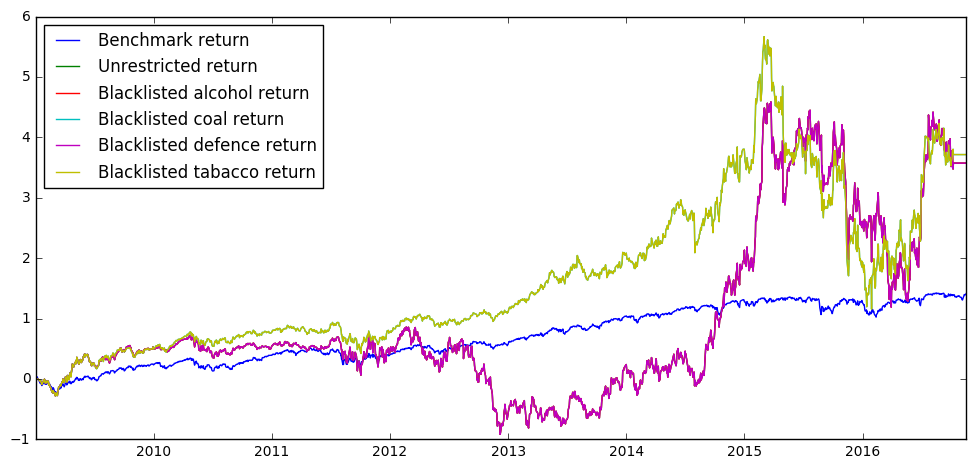

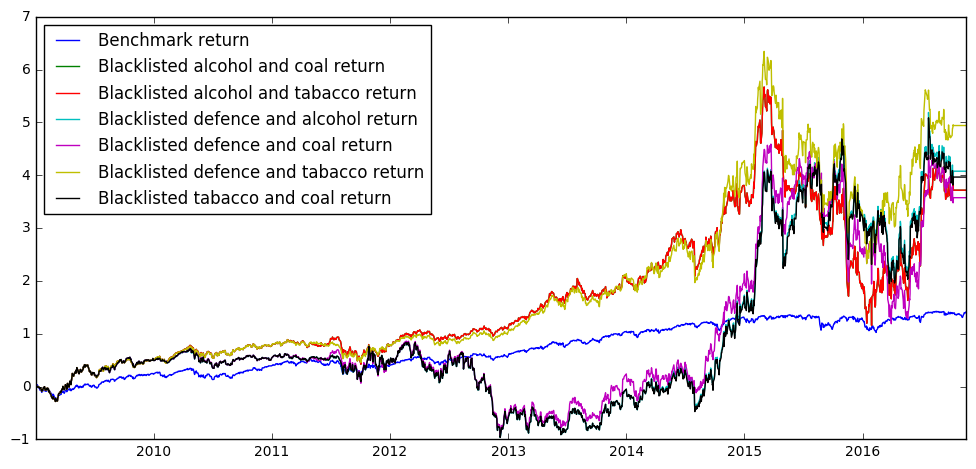

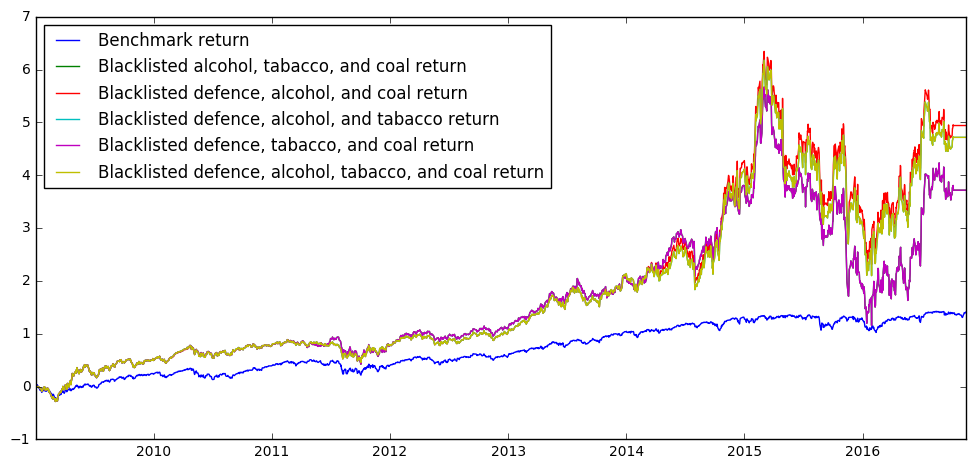

In [7]:
%pylab inline
figsize(12, 12)
import matplotlib.pyplot as plt

fig_return_1 = plt.figure()
return_graph_1 = fig_return_1.add_subplot(211)
bench_performance = plt.plot(performance.benchmark_period_return, label='Benchmark return')
algo_performance = plt.plot(performance.algorithm_period_return, label='Unrestricted return')
algo_performance_alc = plt.plot(performance_alc.algorithm_period_return, label='Blacklisted alcohol return')
algo_performance_coal = plt.plot(performance_coal.algorithm_period_return, label='Blacklisted coal return')
algo_performance_def = plt.plot(performance_def.algorithm_period_return, label='Blacklisted defence return')
algo_performance_tab = plt.plot(performance_tab.algorithm_period_return, label='Blacklisted tabacco return')
plt.legend(loc=0)
plt.show()

fig_return_2 = plt.figure()
return_graph_2 = fig_return_2.add_subplot(211)
bench_performance = plt.plot(performance.benchmark_period_return, label='Benchmark return')
algo_performance_alcCoal = plt.plot(performance_alcCoal.algorithm_period_return, label='Blacklisted alcohol and coal return')
algo_performance_alcTab = plt.plot(performance_alcTab.algorithm_period_return, label='Blacklisted alcohol and tabacco return')
algo_performance_defAlc = plt.plot(performance_defAlc.algorithm_period_return, label='Blacklisted defence and alcohol return')
algo_performance_defCoal = plt.plot(performance_defCoal.algorithm_period_return, label='Blacklisted defence and coal return')
algo_performance_defTab = plt.plot(performance_defTab.algorithm_period_return, label='Blacklisted defence and tabacco return')
algo_performance_tabCoal = plt.plot(performance_tabCoal.algorithm_period_return, label='Blacklisted tabacco and coal return')
plt.legend(loc=0)
plt.show()

fig_return_3 = plt.figure()
return_graph_3 = fig_return_3.add_subplot(211)
bench_performance = plt.plot(performance.benchmark_period_return, label='Benchmark return')
algo_performance_alcTabCoal = plt.plot(performance_alcTabCoal.algorithm_period_return, label='Blacklisted alcohol, tabacco, and coal return')
algo_performance_defAlcCoal = plt.plot(performance_defAlcCoal.algorithm_period_return, label='Blacklisted defence, alcohol, and coal return')
algo_performance_defAlcTab = plt.plot(performance_defAlcTab.algorithm_period_return, label='Blacklisted defence, alcohol, and tabacco return')
algo_performance_defTabCoal = plt.plot(performance_defTabCoal.algorithm_period_return, label='Blacklisted defence, tabacco, and coal return')
algo_performance_excluded = plt.plot(performance_excluded.algorithm_period_return, label='Blacklisted defence, alcohol, tabacco, and coal return')
plt.legend(loc=0)
plt.show()

As we can see our algorithm does not outperform the benchmark. Thus, let us take a deeper look into our distribution of long and short values in the portfolio and our overall return.

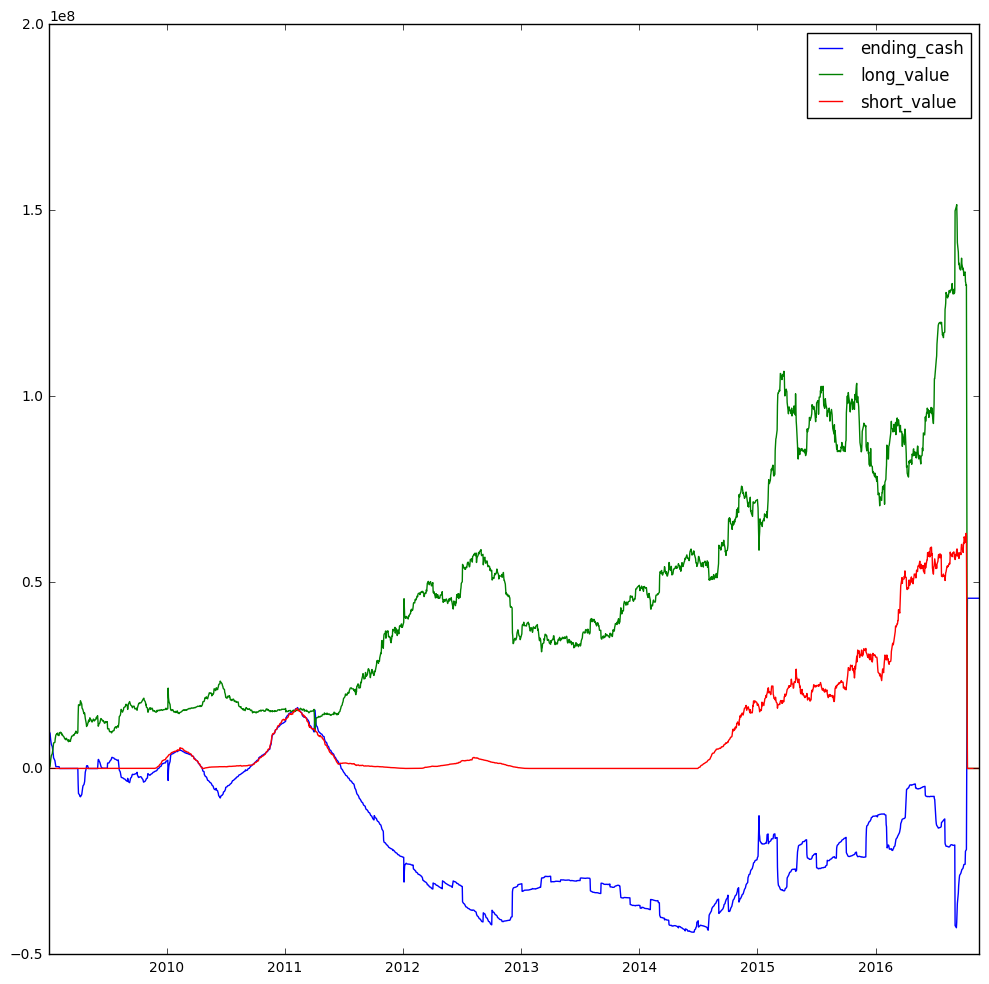

In [4]:
return_graph2 = fig.add_subplot(212)
algo_return = plt.plot(performance.ending_cash)
algo_long = plt.plot(performance.long_value)
# Take inverse of short value for comparison (by default short is always negative)
algo_short = plt.plot(-performance.short_value)
plt.legend(loc=0)
plt.show()

As we can see from the above figure, our algorithm performs quite well at the beginning. Around mid of October we see that the value which is bound in short investments starts to increase faster then our long investments. From the benchmark in the previous figure we have seen that the overall market increases. However, the algorithm holds primarily values that predict a decreasing market. As a first result, the RSI seems not to be a very well predictor of the actual value and the market behaviour. As we ran the simulation only for 2 months, this might only be true for that period of time. In a next step, we would need to analyse it over a longer period of time and go into depths of how RSI is calculated. Since we do not use RSI in our final algorithm, we will exclude this analysis here.

### Sharpe ratio
With the Sharpe ratio we can determine the return in respect to the risk involved. The Sharpe ratio is calculated by dividing the sum of the asset return and a benchmark return (S&P500 in our case) by the standard deviation of the asset return. The higher the Sharpe ratio, the higher the return with the same risk or the lower the risk with same return.

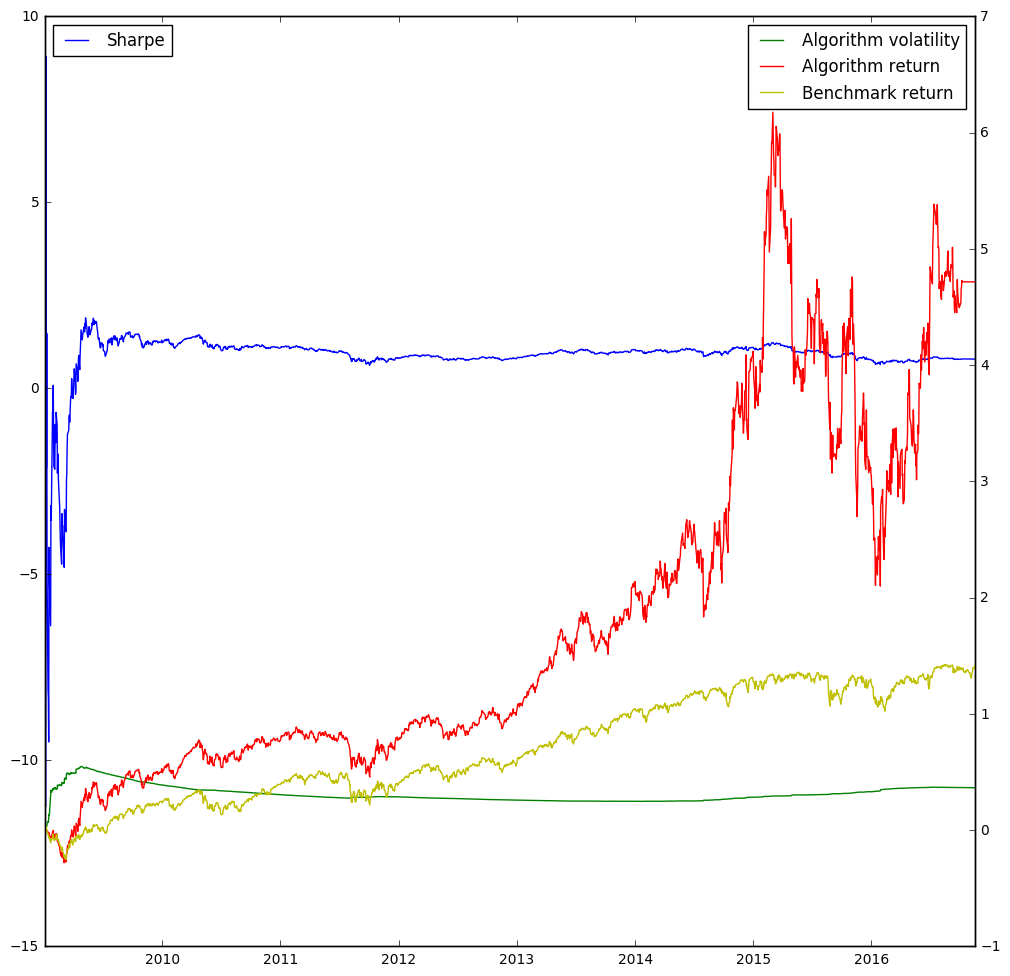

In [13]:
return_graph3, ax1 = plt.subplots()
ax1.plot(performance_excluded.sharpe, 'b', label="Sharpe")
plt.legend(loc=2)
ax2 = ax1.twinx()
ax2.plot(performance_excluded.algo_volatility, 'g', label="Algorithm volatility")
ax2.plot(performance_excluded.algorithm_period_return, 'r', label="Algorithm return")
ax2.plot(performance_excluded.benchmark_period_return, 'y', label="Benchmark return")
plt.legend(loc=1)
plt.show()

From the above figure we see the Sharpe ratio as well as the three components the ratio is calculated from: algo_volatility (the standard deviation of asset return), algorithm_period_return and benchmark_period_return. Our algorithm performs quite poorly in terms of Sharpe ratio as overall performance is worse than the benchmark and the volatility of the return increases over time due to our losses.

### Alpha and Beta
The alpha value expresses the performance of the fund in comparison to a benchmark. Typically a higher alpha indicates a higher profitability in comparison to the benchmark. An alpha of zero means exact performance as the benchmark, a positive value indicates outperforming the benchmark and a negative value represents falling behind the benchmark.

The beta value shows the volatility of the fund in comparison to a benchmark. The beta value baseline is one and represents the same volatility as the benchmark. A value below one indicates a lower volatility and consequently a value above one a higher volatility than the benchmark.

<function matplotlib.pyplot.show>

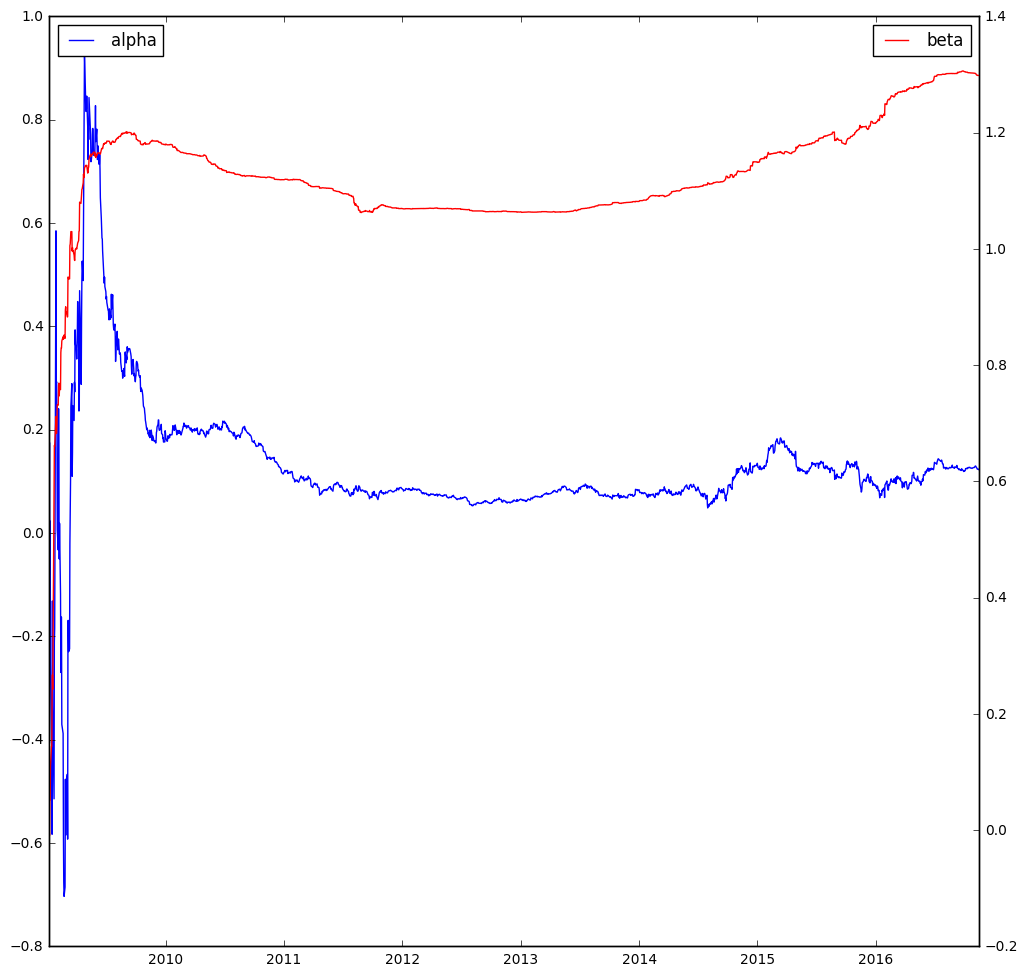

In [14]:
alpha_graph, ax1 = plt.subplots()
ax1.plot(performance_excluded.alpha, 'b')
plt.legend(loc=2)
ax2 = ax1.twinx()
ax2.plot(performance_excluded.beta, 'r')
plt.legend(loc=1)
plt.show

The figure above shows that the alpha value is decreasing overtime and confirms our observations earlier: our algorithm performs quite poorly in comparison to the S&P500.

Our beta value stays for the whole period below one, which means that our algorithm could be independent from the market. However, as it drops below zero the beta indicates that the algorithm reacts exactly opposite to the overall market.

## Time-based Performance
Lastly, we want to analyse our performance over time in terms of weekly and monthly results. Therefore our above mentioned indicators including return, Sharpe ratio, alpha and beta are put into a timely perspective.

In [16]:
monthly_returns = performance_excluded.returns.resample('M', how='mean')
weekly_returns = performance_excluded.returns.resample('W', how='mean').dropna()
# replace NaN values for plotting with default return (0)
daily_returns = performance_excluded.returns.fillna(value=0)

In [17]:
monthly_sharpe = performance_excluded.sharpe.resample('M', how='mean')
weekly_sharpe = performance_excluded.sharpe.resample('W', how='mean').dropna()
# drop NaN values for plotting
daily_sharpe = performance_excluded.sharpe.dropna()

In [18]:
monthly_alpha = performance_excluded.alpha.resample('M', how='mean')
weekly_alpha = performance_excluded.alpha.resample('W', how='mean').dropna()
# drop NaN values for plotting
daily_alpha = performance_excluded.alpha.dropna()

In [19]:
monthly_beta = performance_excluded.beta.resample('M', how='mean')
weekly_beta = performance_excluded.beta.resample('W', how='mean').dropna()
# drop NaN values for plotting
daily_beta = performance_excluded.beta.dropna()

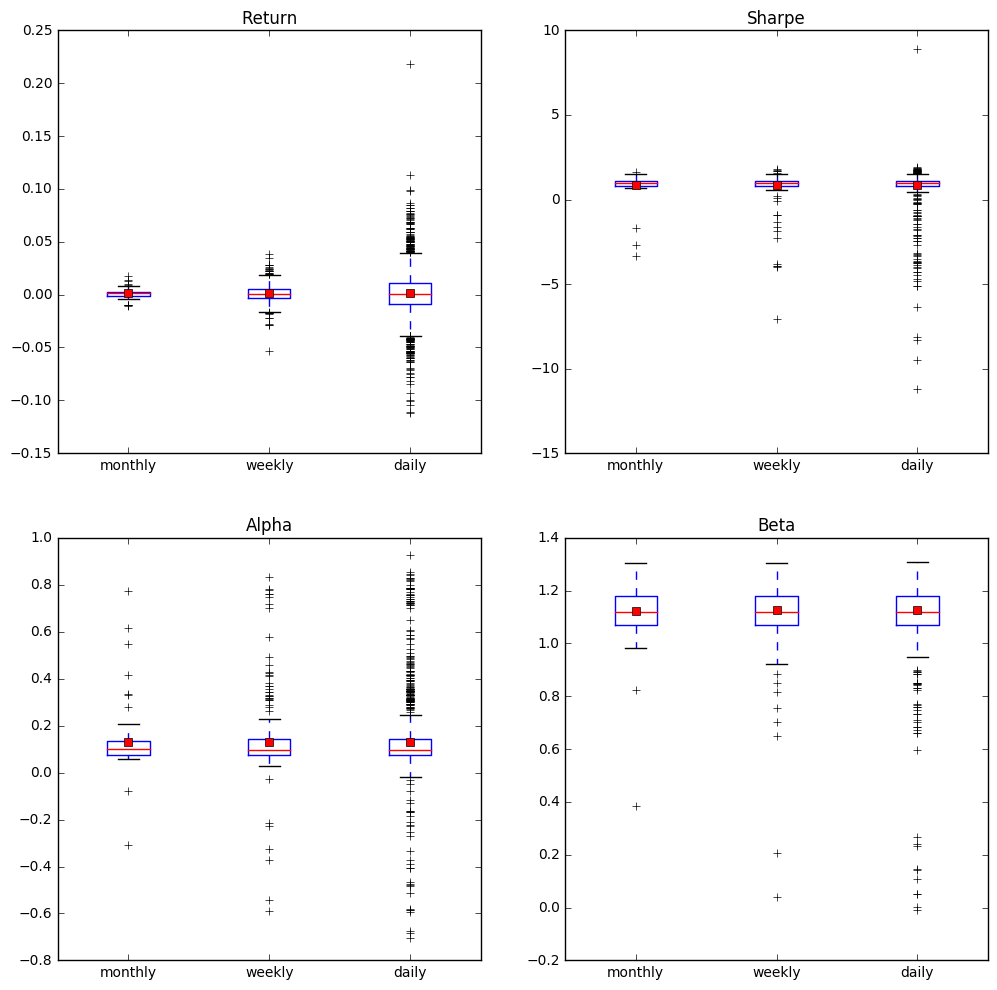

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2)
labels = ['monthly', 'weekly', 'daily']
axes[0, 0].boxplot((monthly_returns, weekly_returns, daily_returns), labels=labels, showmeans=True)
axes[0, 0].set_title('Return')
axes[0, 1].boxplot((monthly_sharpe, weekly_sharpe, daily_sharpe), labels=labels, showmeans=True)
axes[0, 1].set_title('Sharpe')
axes[1, 0].boxplot((monthly_alpha, weekly_alpha, daily_alpha), labels=labels, showmeans=True)
axes[1, 0].set_title('Alpha')
axes[1, 1].boxplot((monthly_beta, weekly_beta, daily_beta), labels=labels, showmeans=True)
axes[1, 1].set_title('Beta')
plt.setp(axes)
plt.show()

Generally the standard deviation of our measurements increases when we go from monthly, to weekly and then to a daily view. This is primarily caused by having more data points the finer the date granularity. However, with the Sharpe ratio it is quite interesting to see, that the weekly and daily standard devition stays quite similar.

In [21]:
from statistics import stdev
print('Standard deviation\nWeekly Sharpe: {}\nDaily: Sharpe {}'.format(stdev(weekly_sharpe), stdev(daily_sharpe)))

Standard deviation
Weekly Sharpe: 0.7188186764841908
Daily: Sharpe 0.8038617329047903


The other measurements are less interseting and more data would be required to give a better view on their behaviour in relation to the time perspective. Especially, since the return of the algorithm more or less constantly falls behind the benchmark, the monthly indicators give a quite good representation of the overall trend. Simulating the algorithm for a year or more would however increase their meaning.